# ObsID : 0945040133, SRCNUM : 11, Instru : EPN
Not on Simbad

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [2]:
Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945040133_SRCNUM11_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.409e-03 +/- 9.121e-04 (100.0 % total)


 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-3
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.011e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945040133_SRCNUM11_EPN_background_spectrum.fits
  Background Exposure Time: 1.011e+04 sec
 Using Response (RMF) File            ObsID0945040133_SRCNUM11_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945040133_SRCNUM11_EPN.arf



## Plot spectrum

In [3]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 857.5, 661.5, -0.5)

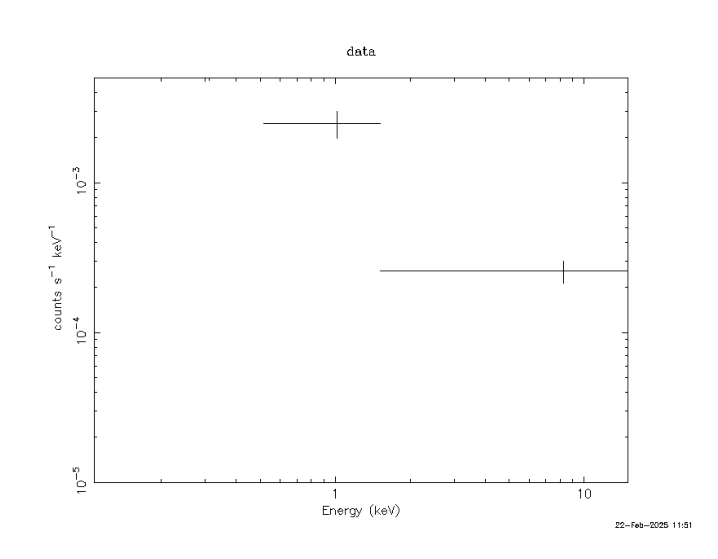

In [4]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              7.711327e+11     using 3 bins.

Tes

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 856.5, 661.5, -0.5)

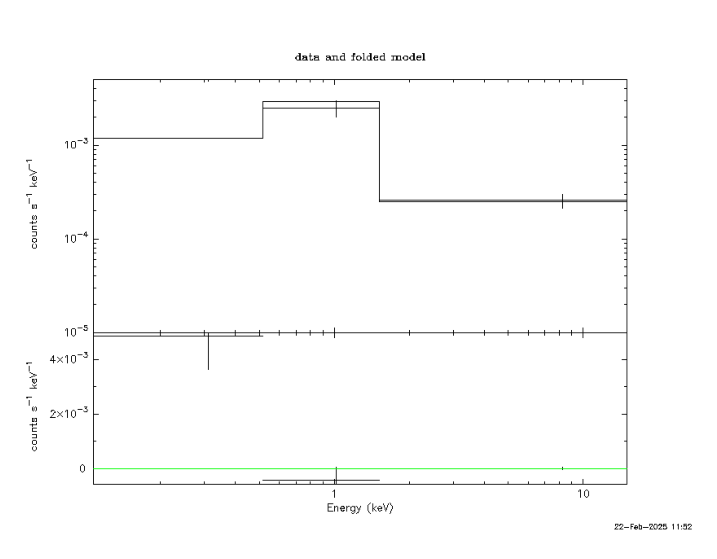

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### bremsstrahlung model

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.278465e+10     using 3 bins.

Test statistic : Chi-Squared              2.278465e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
26.0587      2.48376      -3      0.310072       3.14540   3.06476e-05
17.3583      138655       -1      0.135344       5.66130   2.56927e-05
14.5839      73544.8       0     0.0981218       7.87839   2.55835e-05
12.4382      21116        -

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 856.5, 662.5, -0.5)

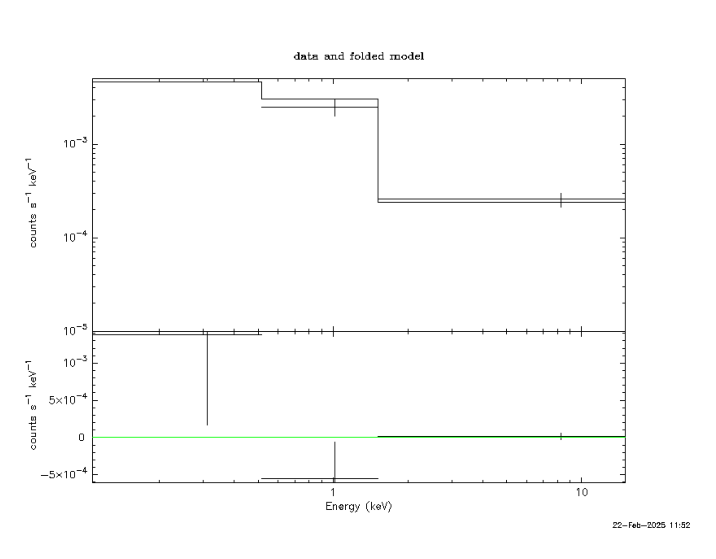

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [12]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp


GammQ: A <=  0
GammQ: A <=  0


   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.452309e+09     using 3 bins.

Test statistic : Chi-Squared              3.452309e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
31.4713      5.90082      -3       1.86360      0.823168   0.000305783
24.3267      15080.6      -3       1.68983      0.892835   0.000391064
23.9363      4126.28      -2       1.74862      0.864111   0.000399961
23.9342      

(-0.5, 856.5, 665.5, -0.5)

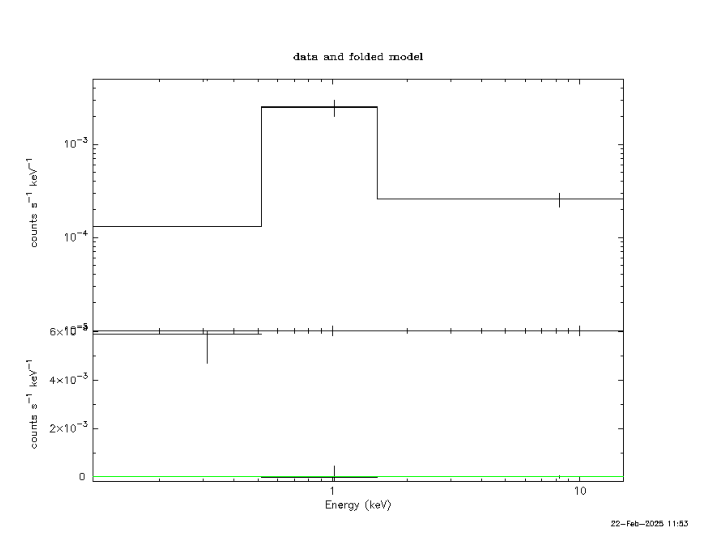

In [11]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.751433e+11     using 3 bins.

Test statistic : Chi-Squared              1.751433e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
25.6589      2.11862      -3      0.192881       1.44663   1.37741e-05
11.5604      364795       -1     0.0329035       1.05149   1.14912e-05
8.99782      259474       -1    0.00143467      0.915719   9.58741e-06
7.413        397302      

GammQ: A <=  0
GammQ: A <=  0


-

Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.31628E-10  +/-  1.42938E-02  
   2    2   powerlaw   PhoIndex            0.960446     +/-  0.239797     
   3    2   powerlaw   norm                1.07731E-05  +/-  2.47280E-06  
________________________________________________________________________


Fit statistic  : Chi-Squared                  5.8271     using 3 bins.

Test statistic : Chi-Squared                  5.8271     using 3 bins.
 Cannot calculate null hypothesis probability.


(-0.5, 861.5, 657.5, -0.5)

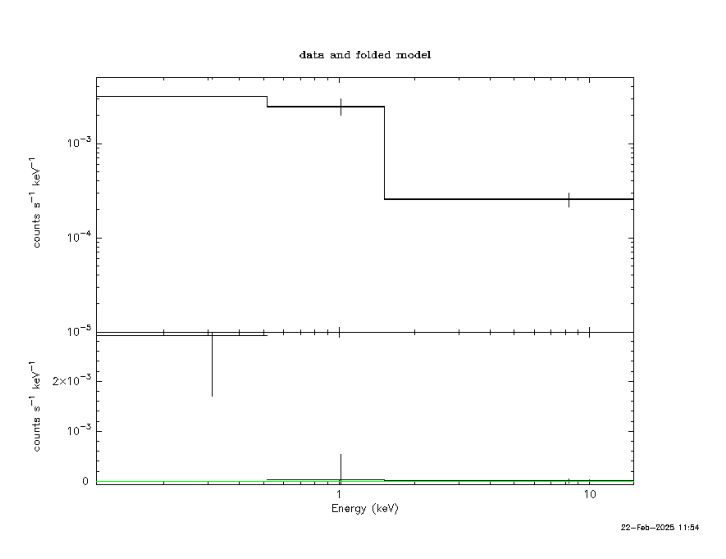

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Flux

In [15]:
AllModels.calcFlux(".2 12.0")

 Model Flux 4.4928e-05 photons (2.1671e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [16]:
Flux = 2.1671e-13 # ergs/cm^2/s

### ESASky

https://sky.esa.int/esasky/?target=54.38275000000001%20-28.289333333333335&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033731.8-281722
- IAU name : 4XMM J033731.8-281721
- RA : 03h 37m 31.839s
- DEC : -28° 17' 22.01"

### Luminosity
No distance or parallax is available on ESASky.